# UE analyse des données environnementales :
Séance 1 : prise en main des données

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
import math
#data_simulated_future
import statsmodels.api as sm
import pylab as py
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Importation des données
Données accessibles :
- Données simulées passées
- Données simulées futures
- Données observées passées
- Incertitude des données observées passées

Labels correspondants :
- Les noms (labels) des modèles climatiques
- Les dates (labels) passées recouvertes
- Les dates (labels) futures recouvertes


In [3]:
# Importation des données simulées et observées
matrix_1 = np.load('data/matrix_1.npy')
matrix_2 = np.load('data/matrix_2.npy')
matrix_3 = np.load('data/matrix_3.npy')
matrix_4 = np.load('data/matrix_4.npy')

# Importation des labels correspondants
label_models       = np.load('data/label_models.npy')
label_past_times   = np.load('data/label_past_times.npy')
label_future_times = np.load('data/label_future_times.npy')

# Introduction



# Exercice

Parmis les quatre matrices de données, il y a :
- une matrice de données simulant l'anomalie de température passée (data_simulated_past)
- une matrice de données simulant l'anomalie de température future (data_simulated_future)
- une matrice de données mesurant l'anomalie de température passée (data_observed_past)
- une matrice de données d'incertitude (écart type) de l'anomalie mesurée (data_observed_past_sigma)

Retrouvez la correspondance avec les 4 matrices, et complétez ci-dessous.


- len(label_models) = 25
- len(label_past_times) = 172
- len(label_future_times) = 78
- np.shape(matrix_1) = (25,78) simu future
- np.shape(matrix_2) = (1,172) anomalie temlp past
- np.shape(matrix_3) = (25,172) simu past
- np.shape(matrix_4) = (172,) ecart_typr

matrice

array([0.08752257, 0.09108067, 0.09182824, 0.08145659, 0.0720377 ,
       0.07265641, 0.0753773 , 0.0760674 , 0.07557161, 0.07278285,
       0.07592419, 0.0856903 , 0.0853632 , 0.0968476 , 0.09319424,
       0.0979922 , 0.09213142, 0.10005041, 0.09066202, 0.0815573 ,
       0.07182786, 0.07426971, 0.06889863, 0.06694248, 0.06831194,
       0.07061994, 0.07079655, 0.06566897, 0.06117214, 0.06654593,
       0.06342799, 0.06412728, 0.06358165, 0.05833841, 0.05630027,
       0.0571146 , 0.05185438, 0.06008882, 0.05813515, 0.06241091,
       0.06405682, 0.06941581, 0.06978062, 0.06985317, 0.07234908,
       0.0679944 , 0.06805827, 0.07077759, 0.06727402, 0.06681801,
       0.0675962 , 0.06951292, 0.06961422, 0.06504741, 0.06697504,
       0.06493764, 0.06703293, 0.0623082 , 0.06306609, 0.05962485,
       0.06360336, 0.06277276, 0.0579888 , 0.06235865, 0.06131174,
       0.06638675, 0.0707572 , 0.07607126, 0.08030485, 0.07956118,
       0.0765406 , 0.07197774, 0.06473219, 0.06440941, 0.06467

In [4]:
data_simulated_past      = matrix_3
data_simulated_future    = matrix_1
data_observed_past       = matrix_2
data_observed_past_sigma = matrix_4

In [32]:
print("Nombre de modèles des données passées:",len(data_simulated_past))
print("Nombre d'années des données passées: ",len(data_simulated_past.T))
print("Nombre de modèles des données simulées:", len(data_simulated_future))
print("Nombre de modèles des données simulées;",len(data_simulated_future.T))

Nombre de modèles des données passées: 25
Nombre d'années des données passées:  172
Nombre de modèles des données simulées: 25
Nombre de modèles des données simulées; 78


# Exercice

Quels sont les noms des différents modèles climatiques ?

In [4]:
print(label_models)
print(len(label_models))

['ACCESS-CM2' 'ACCESS-ESM1-5' 'AWI-CM-1-1-MR' 'BCC-CSM2-MR' 'CAMS-CSM1-0'
 'CAS-ESM2-0' 'CESM2' 'CIESM' 'CMCC-ESM2' 'CNRM-CM6-1' 'CanESM5'
 'EC-Earth3' 'FIO-ESM-2-0' 'GFDL-ESM4' 'GISS-E2-1-G' 'INM-CM5-0'
 'IPSL-CM6A-LR' 'KACE-1-0-G' 'KIOST-ESM' 'MCM-UA-1-0' 'MIROC6'
 'MRI-ESM2-0' 'NESM3' 'TaiESM1' 'UKESM1-0-LL']
25


## ________________________________________________________________________________________________
Nous avons 25 modèles climatiques différents: ACCESS-CM2, ACCESS-ESM1-5, AWI-CM-1-1-MR, BCC-CSM2-MR, CAMS-CSM1-0, CAS-ESM2-0, CESM2, CIESM, CMCC-ESM2, CNRM-CM6-1, CanESM5, EC-Earth3, FIO-ESM-2-0, GFDL-ESM4, GISS-E2-1-G, INM-CM5-0, IPSL-CM6A-LR, KACE-1-0-G, KIOST-ESM, MCM-UA-1-0, MIROC6, MRI-ESM2-0, NESM3, TaiESM1 et UKESM1-0-LL.
Nos données sont des anomalies de température (i.E des températures auxquelles on soustrait une température de référence). Ces températures sont des températures moyennées sur chaque années sur tout le globe et la température de référence à été prise entre 1850 et 1900 (en phase "pré-industrielle").
<br>
Parmi ces données, nous avons des données simulées de 1850 à 2099 selon les 25 différents modèles ainsi qu'un série temporelle d'observations entre 1850 et 2021 ainsi que sont incertitude. Nous avons donc un  interval de temps passé simulé de 78 ans et un interval de temps simulé de 172 ans.


# Exercice

Quel est l'interval de temps passé simulé et observé ?

Quel est l'interval de temps futur simulé ?

In [9]:
print("Interval de temps passé simulé et observé:",len(label_future_times),"ans")
print("Interval de temps futur simulé:",len(label_past_times), "ans")

Interval de temps passé simulé et observé: 78 ans
Interval de temps futur simulé: 172 ans


# Exercice

Affichez l'évolution de l'anomalie de température, pour les différents modèles climatiques, et pour les observations. Les simulations sont-elles cohérentes avec les observations ?




In [24]:
def last0(data):
    i = 0
    while(np.flip(data.T)[i]>0):
        i+=1

    return len(data.T)-i-1

In [25]:

i = last0(data_observed_past)
label_past_times[i]


numpy.datetime64('1929')

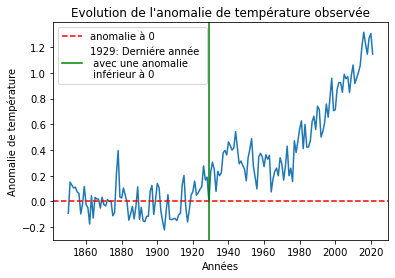

In [50]:
plt.plot(label_past_times,data_observed_past.T)
plt.axhline(y = 0, color = 'r', linestyle = '--', label = "anomalie à 0")
plt.axvline(x = label_past_times[i], color = 'g', label = str(label_past_times[i])+': Derniére année \n avec une anomalie \n inférieur à 0')
plt.title("Evolution de l'anomalie de température observée")
plt.xlabel("Années")
plt.ylabel("Anomalie de température")
plt.legend(loc="upper left")

Nous avons ici en bleu l'évolution de l'anomalie de température entre 1850 et 2021. On remarque que, aprés l'année 1930 ici indiquée par la doite verticale verte, le anomalié de température enregistrée sont toutes supérieur à 0°C

Text(0, 0.5, 'Anomalie de température')

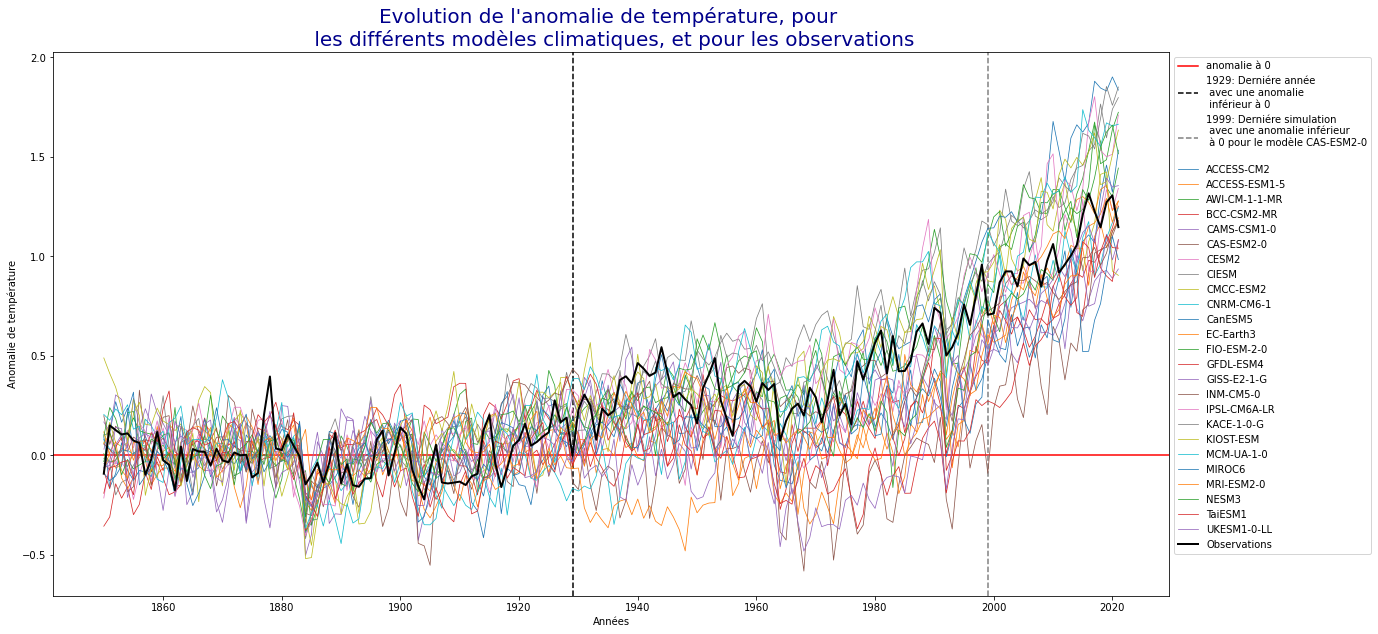

In [47]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.axhline(y = 0, color = 'r', linestyle = '-', label = "anomalie à 0")
plt.axvline(x = label_past_times[i], color = 'black',linestyle = "--", label = str(label_past_times[i])+': Derniére année \n avec une anomalie \n inférieur à 0')
plt.axvline(x = label_past_times[j], color = 'grey',linestyle = "--", label = str(label_past_times[j])+': Derniére simulation \n avec une anomalie inférieur \n à 0 pour le modèle ' + str(label_models[5] + "\n"))
ax.plot(label_past_times,data_simulated_past.T, label = label_models,linewidth = '.75')
ax.plot(label_past_times,data_observed_past.T,color='black',label="Observations",linewidth = '2')
plt.legend(loc="upper left",bbox_to_anchor=(1, 1))
plt.title("Evolution de l'anomalie de température, pour \n les différents modèles climatiques, et pour les observations",c="darkblue",fontsize = 20)
plt.xlabel("Années")
plt.ylabel("Anomalie de température")

## _____________________________________________________________________________________________________________
En observant l'évolution de l'anomalie de températures ainsi que les 25 différents modèles climatiques on remarque que ces derniers suivent assez bien la tendances des observations avant les années 1930, et commencent à se dispérser un peu plus aprés. On remarque également que aprés 1929 (derniére années avec une température observée inférieur à la température de référence), certains modèle simule encore des anomalies de températures inférieur à 0 jusqu'à 1999, date à laquelle le modèle CAS-ESM2-0 prédit la derniére anomalie inférieur à 0 parmi les 25 modèles.

Affichez la série temporelle moyenne multi-modèle et son incertitude à un écart type (aide : fonction fill_between de matplotlib).

Text(0, 0.5, 'Anomalie de température')

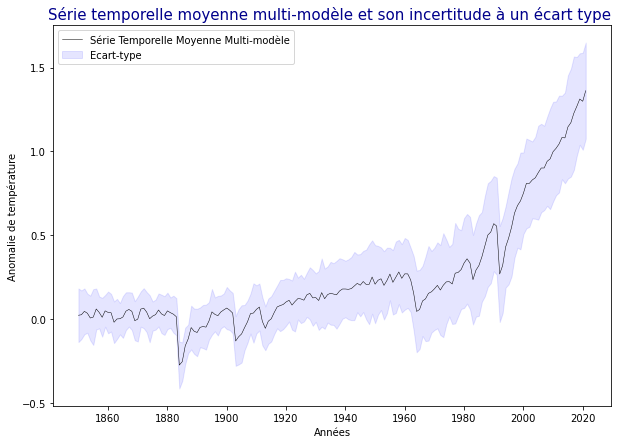

In [78]:
#plt.plot(label_past_times,np.mean(data_simulated_past.T,1))

#ci = 1.96 * np.std(np.mean(data_simulated_past.T,1))/np.sqrt(len(label_past_times))
#ci = np.std(np.mean(data_simulated_past.T,1))/2
ci = np.std(data_simulated_past.T, axis = 1 )
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(label_past_times,np.mean(data_simulated_past.T,1),color='black',linewidth = '0.5',label = "Série Temporelle Moyenne Multi-modèle")
ax.fill_between(label_past_times, (np.mean(data_simulated_past.T,1)-ci), (np.mean(data_simulated_past.T,1)+ci), color='b', alpha=.1,label = "Ecart-type")
plt.legend(loc="upper left")
plt.title("Série temporelle moyenne multi-modèle et son incertitude à un écart type ", c="darkblue",fontsize = 15)
plt.xlabel("Années")
plt.ylabel("Anomalie de température")

Affichez la série temporelle observée et son incertitude à un écart type (aide : fonction fill_between de matplotlib).

Text(0, 0.5, 'Anomalie de température')

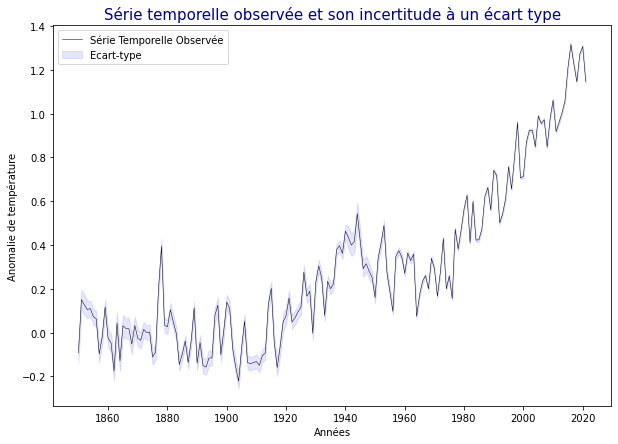

In [84]:
#plt.plot(label_past_times,np.mean(data_simulated_past.T,1))
sigma = data_observed_past_sigma
#ci = 1.96 * np.std(data_observed_past.T)/np.sqrt(len(label_past_times))
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(label_past_times,data_observed_past.T,color='black',linewidth = '0.5',label = "Série Temporelle Observée")
ax.fill_between(label_past_times, (data_observed_past[0].T-sigma/2), (data_observed_past[0].T+sigma/2), color='b', alpha=.1,label = "Ecart-type")
plt.legend(loc="upper left")
plt.title("Série temporelle observée et son incertitude à un écart type", c="darkblue", fontsize = 15 )
plt.xlabel("Années")
plt.ylabel("Anomalie de température")

In [170]:
indexes = list()
for i in range(len(data_observed_past.T)):
    #print(data_observed_past.T[i])
    ct = abs((np.mean(data_simulated_past.T,1)))+ci + 0.05
    if abs(data_observed_past.T[i]) > ct[i]:
        indexes.append(i)

indexes



[27, 28, 65, 90, 91, 94, 103, 133]

Text(0, 0.5, 'Anomalie de température')

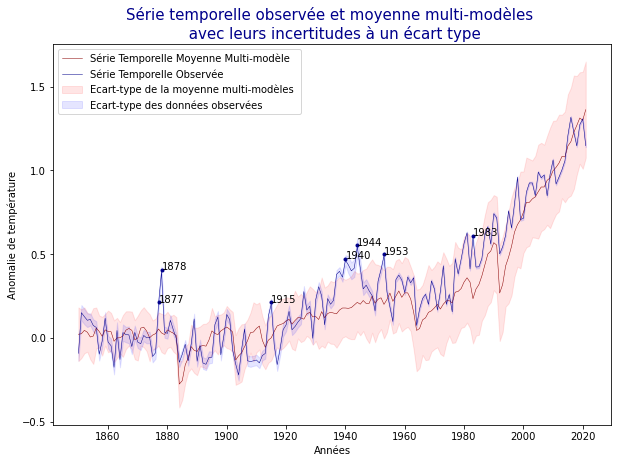

In [189]:

#ci = 1.96 * np.std(data_observed_past.T)/np.sqrt(len(label_past_times))
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(label_past_times,np.mean(data_simulated_past.T,1),color='darkred',linewidth = '0.5',label = "Série Temporelle Moyenne Multi-modèle")
ax.fill_between(label_past_times, (np.mean(data_simulated_past.T,1)-ci), (np.mean(data_simulated_past.T,1)+ci), color='red', alpha=.1,label = "Ecart-type de la moyenne multi-modèles ")

ax.plot(label_past_times,data_observed_past.T,color='darkblue',linewidth = '0.5',label = "Série Temporelle Observée")
ax.fill_between(label_past_times, (data_observed_past[0].T-sigma/2), (data_observed_past[0].T+sigma/2), color='b', alpha=.1,label = "Ecart-type des données observées")

ax.scatter(label_past_times[27], data_observed_past.T[27]+.01,marker = ".",color = "darkblue")
ax.text(label_past_times[27], data_observed_past.T[27]+.01, label_past_times[27])
ax.scatter(label_past_times[28], data_observed_past.T[28]+.01,marker = ".",color = "darkblue")
ax.text(label_past_times[28], data_observed_past.T[28] +.01, label_past_times[28])
ax.scatter(label_past_times[65], data_observed_past.T[65]+.01,marker = ".",color = "darkblue")
ax.text(label_past_times[65], data_observed_past.T[65]+.01, label_past_times[65])
ax.scatter(label_past_times[94], data_observed_past.T[94]+.01,marker = ".",color = "darkblue")
ax.text(label_past_times[94], data_observed_past.T[94]+.01, label_past_times[94])
ax.scatter(label_past_times[90], data_observed_past.T[90]+.01,marker = ".",color = "darkblue")
ax.text(label_past_times[90], data_observed_past.T[90]+.01, label_past_times[90])
ax.scatter(label_past_times[103], data_observed_past.T[103]+.01,marker = ".",color = "darkblue")
ax.text(label_past_times[103], data_observed_past.T[103]+.01, label_past_times[103])
ax.scatter(label_past_times[133], data_observed_past.T[133]+.01,marker = ".",color = "darkblue")
ax.text(label_past_times[133], data_observed_past.T[133]+.01, label_past_times[133])
plt.legend(loc="upper left")
plt.title("Série temporelle observée et moyenne multi-modèles \n avec leurs incertitudes à un écart type", c="darkblue", fontsize = 15 )
plt.xlabel("Années")
plt.ylabel("Anomalie de température")

## ____________________________________________________________________________________________________________________
Nous avons ici l'évolution des anomalies de températures observées ainsi que sont écart-typt en bleu, ainsi que la moyenne multi-modéle de l'évolutions des simulations des 25 modèles ainsi que l'écart-type. On retrouve bien que la moyenne multi-modèles suit la tendance des observations, cependant on observe tout de même quelques disparités, ainsi que certains pics dans les observations qui sont à l'éxtérieur de l'écart-type de la moyenne multi-modèles, par exemple les années 1877, 1878, 1915, 1940, 1944, 1953 et 1983 qui ont des anomalie de température avec plus de 0.05°de difference avec l'écart-type de la moyenne multi-modèles.

# Exercice
Si on fait l'hypothèse que la distribution des données simulées suit une loi gaussienne, donnez les intervalles d'anomalie de température prédits en 2099 à 68%, 95% et 99%.

In [9]:
print(label_future_times[77])
print(data_simulated_future.T[77])


2099
[6.20783919 5.04551869 5.21946808 4.36325057 3.18606351 5.37017169
 6.21773631 6.91696963 5.76378294 6.48165229 7.72475627 6.18312603
 6.07252798 4.27149174 4.26605903 4.07562908 6.90832041 6.316861
 4.08804929 5.44886753 4.26295562 4.68423112 5.75480574 6.26673805
 7.09415585]


In [20]:
#ci = 1.96 * np.std(data_observed_past.T)/np.sqrt(len(label_past_times))
ci68 = 0.47 * np.std(data_simulated_future.T[77])/np.sqrt(len(data_simulated_future.T[77]))
ci95 = 1.65 * np.std(data_simulated_future.T[77])/np.sqrt(len(data_simulated_future.T[77]))
ci99 = 2.33 * np.std(data_simulated_future.T[77])/np.sqrt(len(data_simulated_future.T[77]))

In [21]:
m = np.mean(data_simulated_future.T[77])
print("Moyenne des predictions: ", np.mean(data_simulated_future.T[77]))
print("Intervale de confiance à 68%: ", (m-ci68,m+ci68))
print("Intervale de confiance à 95%: ", (m-ci95,m+ci95))
print("Intervale de confiance à 99%: ", (m-ci99,m+ci99))

Moyenne des predictions:  5.527641105874084
Intervale de confiance à 68%:  (5.421578224826384, 5.633703986921783)
Intervale de confiance à 95%:  (5.155292693685351, 5.899989518062816)
Intervale de confiance à 99%:  (5.001840014722722, 6.053442197025445)


# Exercice
Le dernier exercice supposait que la distribution des données simulées suit une loi gaussienne. Cette hypothèse est-elle vraie ?

c:\Users\sasha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

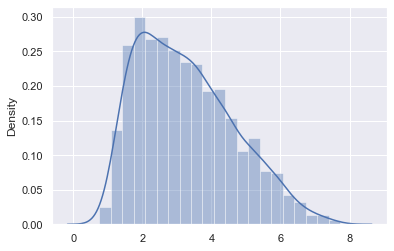

In [22]:
sns.set()
sns.distplot(data_simulated_future.T)

On voit que la distribution des données n'est pas éxactement gaussiénne, en effet nous obtenons une courbe de densité asymétrique positive.

In [30]:
""" 
for i in range(0,len(data_simulated_future.T)):
    stats.probplot(data_simulated_future.T[i], dist="norm", plot=plt)
    plt.show()
"""

' \nfor i in range(0,len(data_simulated_future.T)):\n    stats.probplot(data_simulated_future.T[i], dist="norm", plot=plt)\n    plt.show()\n'

# Exercice
Ces simulations correspondent toutes à un scénario SSP précis. Qu'est ce qu'un scénario SSP ? Pouvez vous trouver auquel ces simulations appartiennent ?

Les trajectoires socio-économiques partagées (en anglais, shared socioeconomic pathways ; SSP) sont des scénarios d'évolutions socio-économiques mondiales projetés jusqu'en 2100. Ils sont utilisés pour élaborer des scénarios d'émissions de gaz à effet de serre associés à différentes politiques climatiques.
Cinq scénarios sont envisagés :
</br>
- SSP1 : Durabilité (Prendre la route verte)
- SSP2 : Milieu de la route
- SSP3 : Rivalités régionales (Une route cahoteuse)
- SSP4 : Inégalités (Une route divisée)
- SSP5 : Développement alimenté par les combustibles fossiles (Prendre l'autoroute)4

</br>
Ils sont utilisés comme base de référence pour la rédaction du sixième rapport d'évaluation du GIEC sur le réchauffement climatique, publié en 2021 et 2022.
</br>
Les SSP fournissent des récits décrivant des différents types de développements socio-économiques. Ces scénarios sont une description qualitative de la logique reliant les éléments des récits les uns aux autres. En termes d'éléments quantitatifs, ils fournissent des données accompagnant les scénarios sur la population nationale, l'urbanisation et le PIB (par habitant). Les SSP peuvent être combinés avec divers modèles d'évaluation intégrée (IAM), pour explorer les voies futures possibles en ce qui concerne les voies socio-économiques et climatiques.

# Exercice : transformation du problème en univarié
Transformez le problème en univarié : on veut prédire l'anomalie moyenne entre 2090 et 2099, à partir de l'anomalie moyenne entre 1850 et 1900.

Construisez X_simu, Y_simu, et X_obs à partir des données, avec :
- X_simu (données simulées passées) de taille (M, 1) avec M modèles climatiques
- Y_simu (données simulées futures) de taille (M, 1)
- X_obs (données observées passées) de taille (1, 1)

Astuce : les type des listes label_past_times et label_future_times sont des datetime64[Y] numpy.

In [23]:
X_date_min = 1850
X_date_max = 1900

Y_date_min = 2090
Y_date_max = 2099

In [24]:
#label_past_times[0:51]
label_past_times[50:101]


array(['1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907',
       '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915',
       '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923',
       '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931',
       '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939',
       '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947',
       '1948', '1949', '1950'], dtype='datetime64[Y]')

In [25]:
X_simu = np.mean(data_simulated_past.T[50:101].T,1)
Y_simu = np.mean(data_simulated_future.T[68:78].T,1)
X_obs  = np.mean(data_observed_past.T[50:101])


In [26]:
#np.shape(data_simulated_future.T[68:78])
#np.shape(data_simulated_past[0:51,])
#np.shape(data_simulated_past)
X_obs


0.1337681574598654

# Question bonus :
La moyenne multi modèle n'utilise que Y_simu. Son incertitude peut être calculée de facon empirique à partir de l'écart type de Y_simu. Que vaut cet écart type ?

Comment utiliser aussi X_simu ou encore X_obs pour diminuer l'incertitude ? Proposez différentes pistes et/ou testez les.


In [27]:
np.std(data_simulated_future.T[68:78].T)

1.0583339771149118

## 3.2 Moyenne multi-modèles
Quelle est la moyenne multi-modèles de Y et son incertitude à un ´ecart type ? Cette incertitude
sera la r´ef´erence pour la suite : il faudra essayer de faire moins.

In [28]:
print("Moyenne de Y: ",np.mean(Y_simu))
print("Ecart type de Y:", np.std(Y_simu))
print("Intervale :", (np.mean(Y_simu)-np.std(Y_simu),np.mean(Y_simu)+np.std(Y_simu)))

Moyenne de Y:  5.220888528398491
Ecart type de Y: 1.0361276688114303
Intervale : (4.18476085958706, 6.257016197209921)


## 3.3 Moyenne pondérée
Implémentez la méthode de moyenne pondérée. Choisissez un paramétrage (σD, σS), et testez le.
Comparez son incertitude avec celle obtenue avec la moyenne multi-modèles. Y-a-t-il une amélioration ?
Etudiez l’impact des paramètres sur la projection et son incertitude. Comment ne prendre en compte que le critère de performance, ou que le critère d’indépendance ?
Comment régler ces paramètres ? Proposez deux m´ethodes et testez les (astuce : si vous êtes
en manque d’idée, vous pouvez vous pencher sur une méthode de validation croisée).

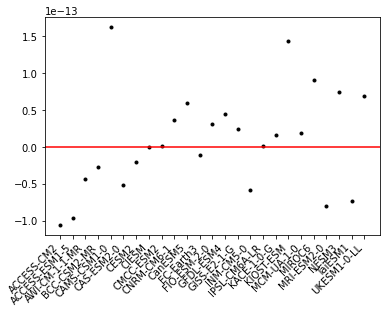

In [120]:
plt.plot(label_models,X_simu,  '.', color='black')
plt.axhline(y = X_obs, color = 'r', linestyle = '-')
plt.xticks(rotation=45, ha='right',fontsize = 10)
plt.show()

In [150]:
print(X_simu[7])
print(X_simu[8])
print(X_simu[14])
print(X_obs)

1.7007092901733402e-18
1.1058692088423128e-15
2.452504430475885e-14
3.864011507273829e-17


In [79]:
def ponderation(sd,ss):
    #sd = 0.5
    #ss = 0.5
    vectP = []
    for i in range(0,len(label_models)):
        D = abs(X_simu[i]-X_obs)
        n = math.exp(-(D**2)/sd**2)
        d = 1
        for j in range(0,len(label_models)):
            if i != j:
                d+= math.exp(-abs(X_simu[i]-X_simu[j])/ss**2)
        vectP += [n/d]
    vectP[:] = [x / sum(vectP) for x in vectP]
    return(vectP)



In [80]:
def estVar(vectP):
    est_sigma = 0
    for i in range(0,len(label_models)):
        est_sigma+=vectP[i]*(Y_simu[i]-np.mean(Y_simu))**2
    return(est_sigma)
    

In [145]:
#print("Estimation de la variance avec Paramétres 0.5 et 0.5 ", estVar(ponderation(0.5,0.5)))
print(sum(ponderation(0.5,0.5)))
#ponderation(0.5,0.5) 



1.0


In [146]:
for i in range(0,10):
    print("Estimation de la variance avec Paramétres:",(10-i,2+i+1), " :",estVar(ponderation(i+1,2+i)))

Estimation de la variance avec Paramétres: (10, 3)  : 1.076567588190204
Estimation de la variance avec Paramétres: (9, 4)  : 1.0739987460634686
Estimation de la variance avec Paramétres: (8, 5)  : 1.073667970563718
Estimation de la variance avec Paramétres: (7, 6)  : 1.0735886509598869
Estimation de la variance avec Paramétres: (6, 7)  : 1.07356400075534
Estimation de la variance avec Paramétres: (5, 8)  : 1.0735554858226615
Estimation de la variance avec Paramétres: (4, 9)  : 1.0735526174767231
Estimation de la variance avec Paramétres: (3, 10)  : 1.0735519225697416
Estimation de la variance avec Paramétres: (2, 11)  : 1.0735520958337141
Estimation de la variance avec Paramétres: (1, 12)  : 1.0735526045576995


## 3.4 Régression linéaire
Entraînez une régression linéaire entre X et Y sur les données simulées, puis prédire à partir de
l’observation. </br>
Comparez son incertitude avec celle obtenue avec la moyenne multi-modèles. Y-a-t-il une amélioration
? </br>
Interpréter les coefficients de la régression linéaire. Que signifient-ils ?
La qualité de régression est-elle bonne ? Appuyez vous sur une métrique pour répondre à cette
question.


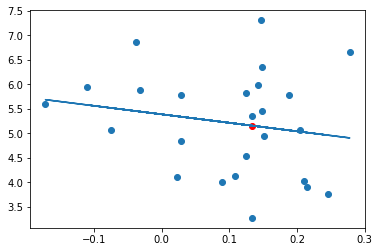

In [147]:
slope, intercept, r, p, std_err = stats.linregress(X_simu, Y_simu)

def predictions(x):
  return slope * x + intercept

mymodel = list(map(predictions, X_simu))

pred = predictions(X_obs)

plt.scatter(X_simu, Y_simu)

plt.plot(X_simu, mymodel)
plt.scatter(X_obs,pred,c='r')
plt.show()

In [149]:
print("slope: ",slope," Intercept: ", intercept)

slope:  -1.7384227894903799  Intercept:  5.390900023425706


In [150]:
s = 0
for i in range(0,len(Y_simu)):
    s += (Y_simu[i]-predictions(X_simu[i]))**2
sigma2 = (1/(25-2))*s
np.sqrt(sigma2)

1.0610623220361783

## 3.5 One-step Kalman </br>
Implémentez et testez cette méthode pour estimer la projection. </br>
Comparez son incertitude avec celle obtenue avec la moyenne multi-modèles. Y-a-t-il une am´elioration? </br>
En se basant sur la relation th´eorique, comment évolue l’incertitude en fonction de la corrélation? Comment évolue l’incertitude en fonction du rapport signal bruit ?

In [180]:

def espcond(X,muX,muY,corrXY,siY,siX,siB):
    return(muY + ((corrXY*siY*siX)/(siX**2 + siB**2))*(X-muX))

In [179]:
siB = np.mean(data_observed_past_sigma[50:101])
siB

0.013777309884516562

In [182]:
muY = np.mean(Y_simu)
muX = np.mean(X_simu) 
corrXY = np.corrcoef(X_simu, Y_simu)[0, 1]
siY = np.std(Y_simu)
siX = np.std(X_simu)
print(espcond(X_obs,muX,muY,corrXY,siY,siX,siB))


5.159289816619411


In [ ]:
def varcond()